In [1]:
import os
import h5py
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# define style for figures
sns.set_theme()
sns.set_style("white")
sns.set_context("notebook")
sns.set_palette("Paired")

C:\Users\Sarah\AppData\Local\Temp\ipykernel_15100\1938326722.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 5))


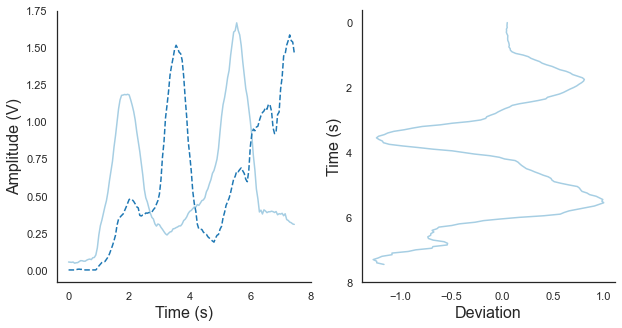

<Figure size 720x360 with 0 Axes>

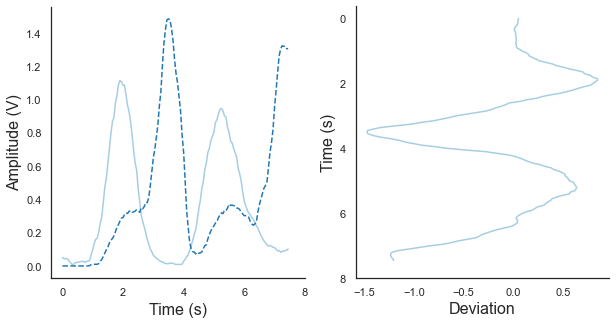

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

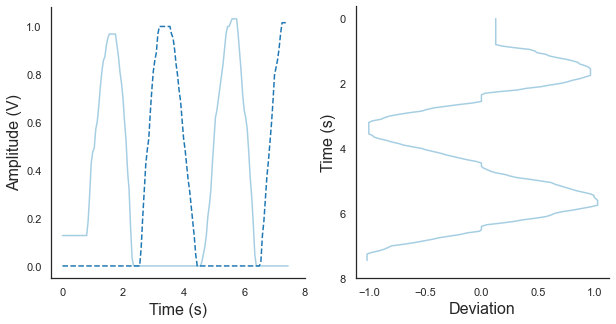

<Figure size 720x360 with 0 Axes>

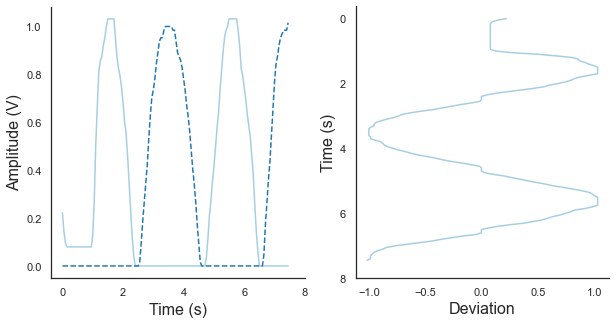

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

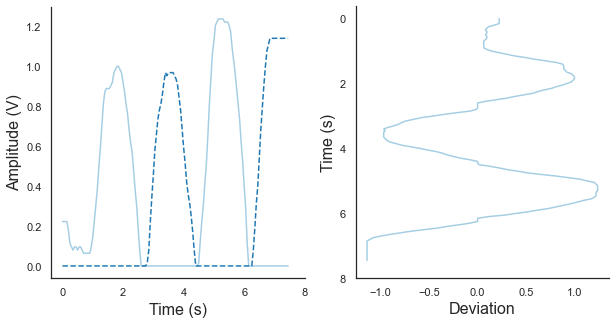

<Figure size 720x360 with 0 Axes>

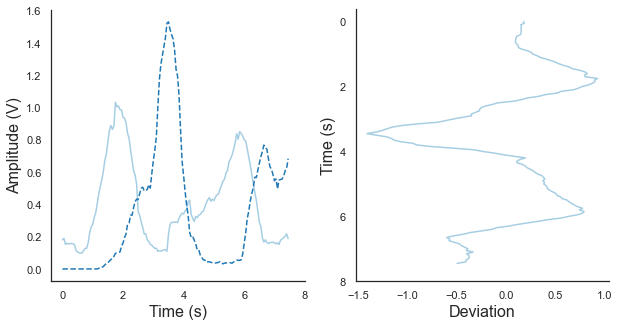

<Figure size 720x360 with 0 Axes>

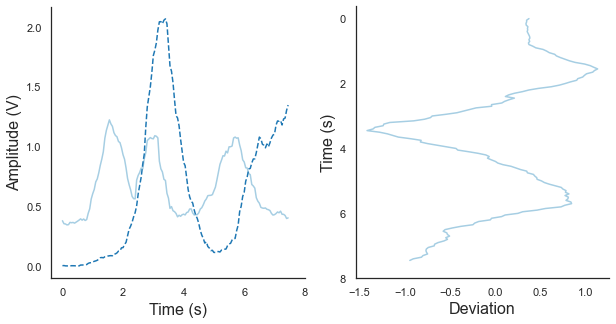

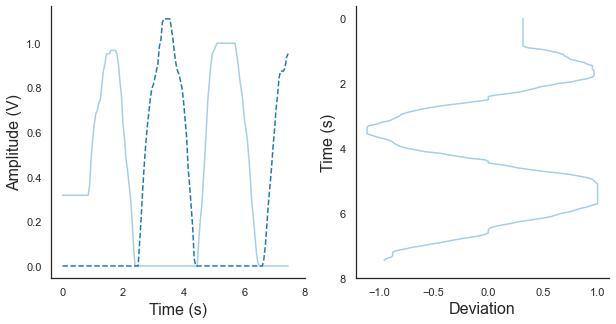

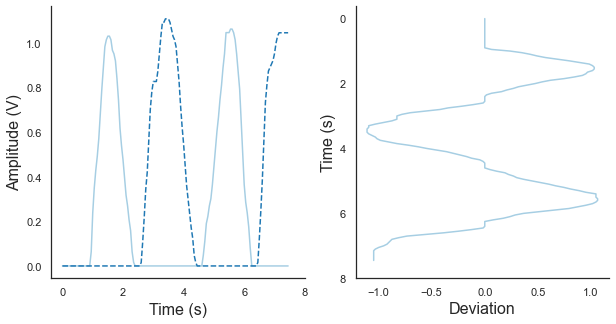

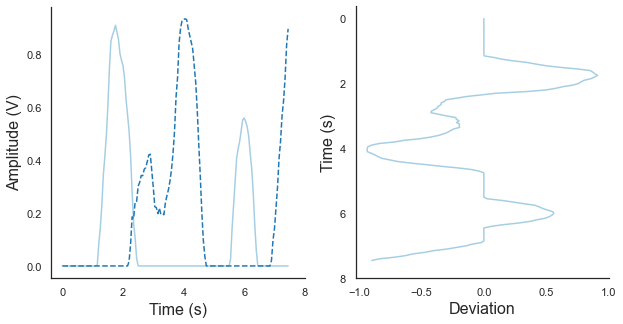

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

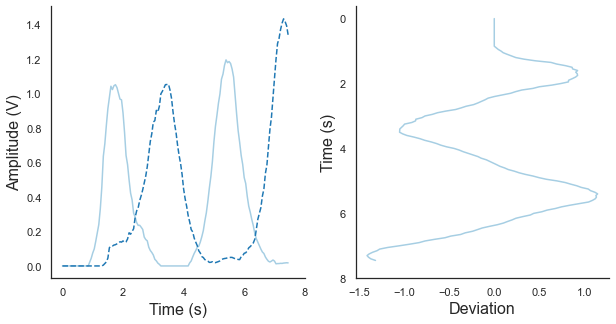

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

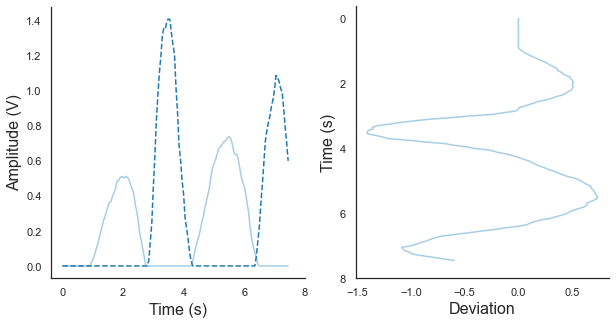

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

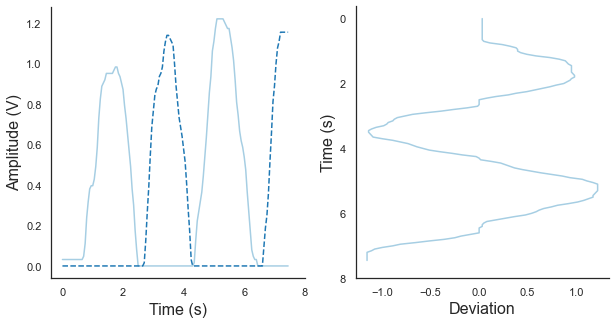

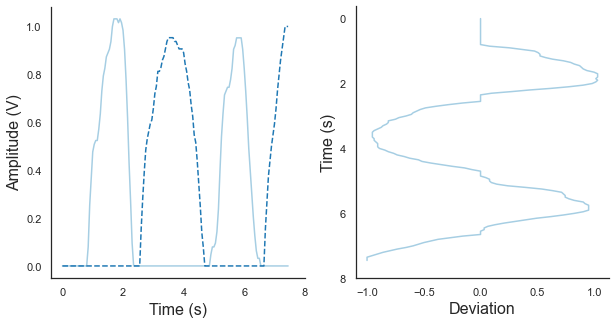

<Figure size 720x360 with 0 Axes>

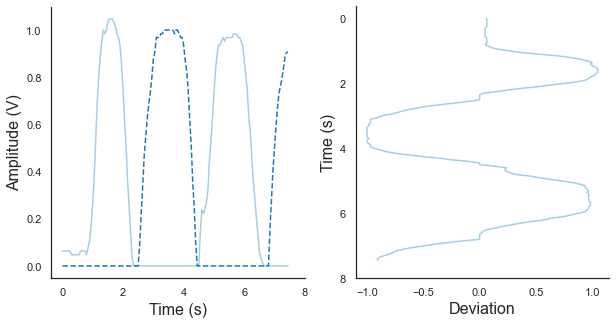

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

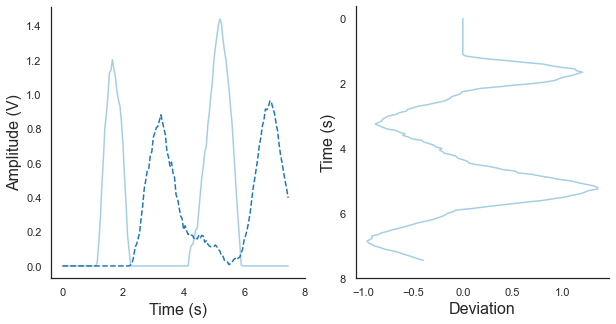

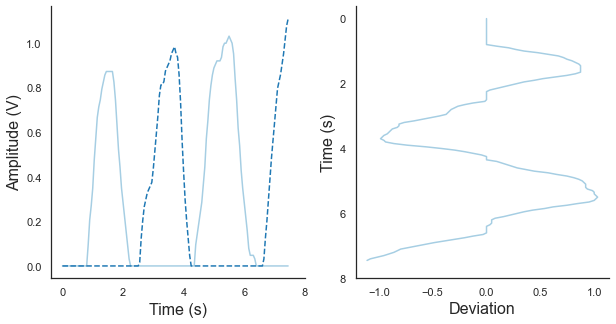

<Figure size 720x360 with 0 Axes>

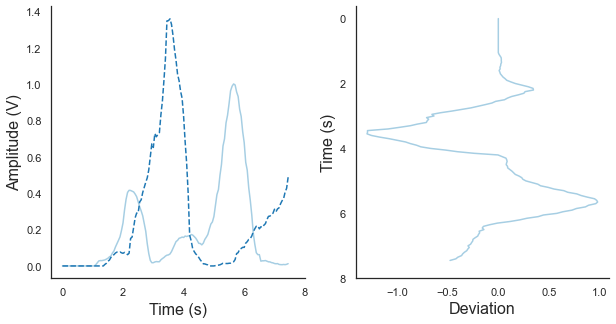

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

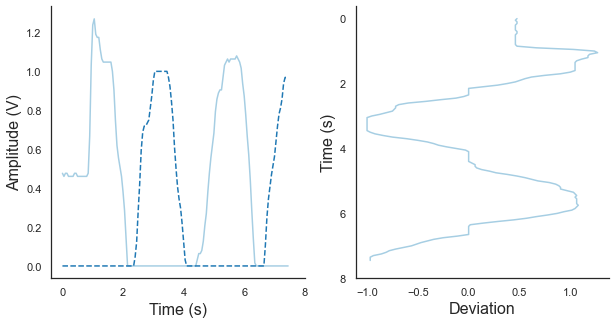

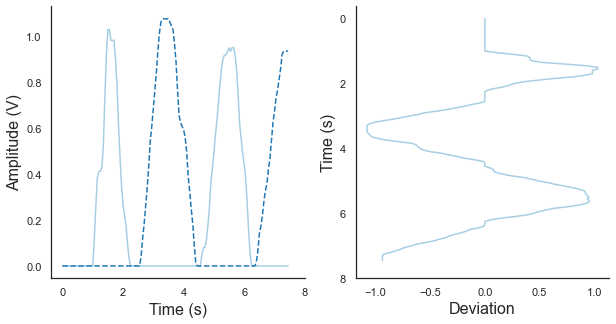

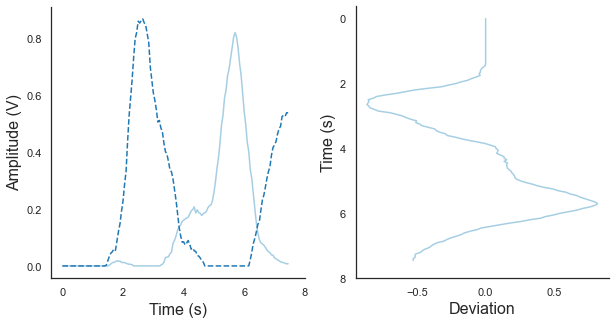

<Figure size 720x360 with 0 Axes>

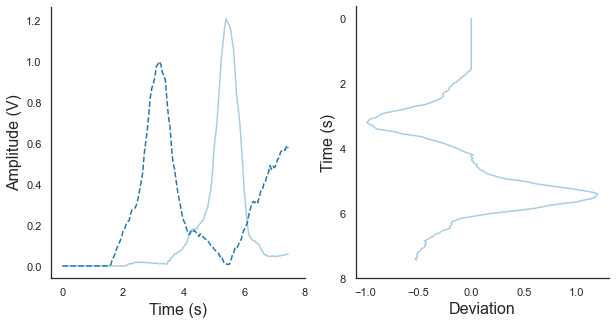

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

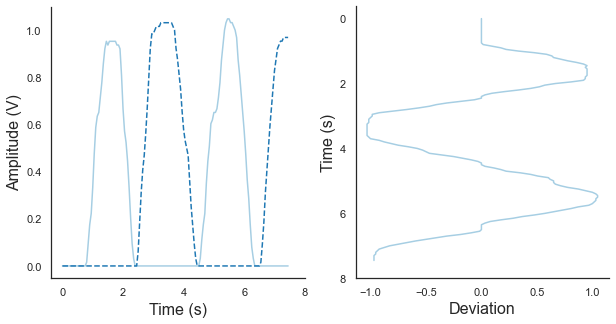

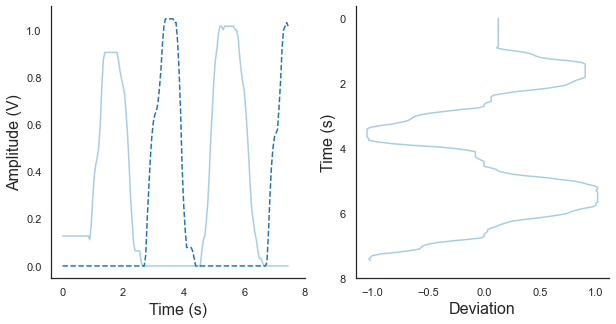

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

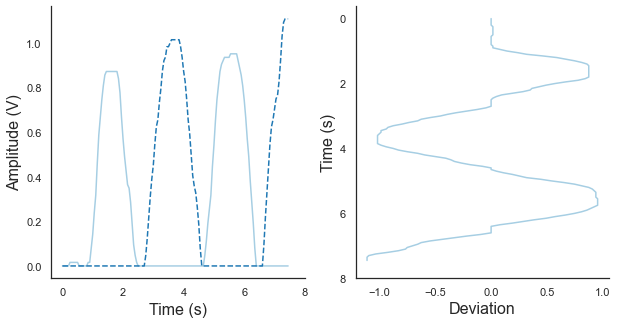

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [2]:
# Read in training data
current_directory = os.getcwd()

# data to read in: SN, BN
data = []

# participants
participants = ('SN001', 'SN002', 'SN003', 'SN004', 'SN005', 'SN006', 'SN007', 'SN008', 'SN009', 'SN010', 'SN011', 'SN012', 'SN013', 'SN014', 'SN015', 'SN016', 'SN017', 'SN018', 'SN019', 'SN020', 'SN021')
# participants = ('SN003', 'SN004')

SN=0
for p in participants:
    SN = SN+1
    root_subject = os.path.join('data', p)
    control_folders = [f.path for f in os.scandir(root_subject) if f.is_dir() and f.name.startswith('control')]
    BN = 0
    for b in control_folders:
        fb = []
        BN = BN+1
        if os.path.isfile(os.path.join(b, 'trials.csv')):
            trials = pd.read_csv(os.path.join(b, 'trials.csv'),)  
        
        plt.figure(figsize=(10, 5))
        
        if  trials["emg"][0] == 1: 
            if os.path.isfile(os.path.join(b, 'data_proc.hdf5')):                   
                data_proc = h5py.File(os.path.join(b, 'data_proc.hdf5'),)
            if os.path.isfile(os.path.join(b, 'cursor_position.hdf5')):
                cursor_position = h5py.File(os.path.join(b, 'cursor_position.hdf5'),) 
            
            if  trials["noise"][1] == 0.0:            
                proc_1 = data_proc['1'][0:][0]
                proc_2 = data_proc['1'][0:][1] 
                
                plt.subplot(1, 2, 1)
                # plt.figure(figsize=(6, 4))
                sns.lineplot(data=proc_1[50:200])
                sns.lineplot(data=proc_2[50:200], linestyle='dashed')
                plt.xlabel('Time (s)', fontsize=16)
                plt.ylabel('Amplitude (V)', fontsize=16)
                #plt.title(f'Normalised EMG Signal')
                plt.xticks(ticks=[0, 40, 80, 120, 160], labels=[0, 2, 4, 6, 8])                
                sns.despine()
                
                cursor_position = cursor_position['1'][50:200]
                timepoints = range(len(cursor_position))
                
                # plt.figure(figsize=(6, 4))
                plt.subplot(1, 2, 2)
                plt.plot(cursor_position, timepoints)
                plt.gca().invert_yaxis()
                plt.ylabel('Time (s)', fontsize=16)
                plt.xlabel('Deviation', fontsize=16)
                #plt.title(f'Cursor Position')                
                plt.yticks(ticks=[0, 40, 80, 120, 160], labels=[0, 2, 4, 6, 8])
                sns.despine()            
                # plt.suptitle(f'Participant {SN} Block {BN} EMG Control', fontsize=16)
            
        if  trials["emg"][0] == 0:                 
            if os.path.isfile(os.path.join(b, 'data_raw.hdf5')):
                data_raw = h5py.File(os.path.join(b, 'data_raw.hdf5'),)
            if os.path.isfile(os.path.join(b, 'cursor_position.hdf5')):
                cursor_position = h5py.File(os.path.join(b, 'cursor_position.hdf5'),) 
            
            if  trials["noise"][1] == 0.0:                        
                raw_1 = data_raw['1'][:][1]*2
                raw_2 = data_raw['1'][:][0]*2
                
                # plt.figure(figsize=(6, 4))
                plt.subplot(1, 2, 1)
                sns.lineplot(data=raw_1[50:200])           
                sns.lineplot(data=raw_2[50:200], linestyle='dashed')
                plt.xlabel('Time (s)', fontsize=16)
                plt.ylabel('Amplitude (V)', fontsize=16)
                #plt.title(f'Joystick Signal', fontsize=16)
                plt.xticks(ticks=[0, 40, 80, 120, 160], labels=[0, 2, 4, 6, 8])
                sns.despine()
                            
                cursor_position = cursor_position['1'][50:200]
                timepoints = range(len(cursor_position))
                        
                # plt.figure(figsize=(6, 4))
                plt.subplot(1, 2, 2)
                plt.plot(cursor_position, timepoints)
                plt.gca().invert_yaxis()
                plt.ylabel('Time (s)', fontsize=16)
                plt.xlabel('Deviation', fontsize=16)
                p# lt.title(f'Cursor Position')
                plt.yticks(ticks=[0, 40, 80, 120, 160], labels=[0, 2, 4, 6, 8])
                sns.despine()
                        
                # plt.suptitle(f'Participant {SN} Block {BN} Joystick Control', fontsize=16)

